Module Code:CS3PP19
Student Number:27838120
Date (when the work completed):12/12/19
Actual hrs spent for the assignment: 20 hours
Assignment evaluation (3 key points):
1.Task 1 is more generic exploratory data analysis
2.The clustering algorithm worked well for 2 clusters in 2 dimensions but 3 clusters was the best number in three dimensions.
3.Task 3 requires a lot of statistics and multiple visualisations to really understand the network as it is large and complex.

# CS3PP19 Programming in Python for Data Science

## Task 1: Bike journey data exploratory data analysis

In [5]:
#import all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from scipy.stats import ttest_ind
import datetime
%matplotlib inline

In [5]:
#Read csv into a pands dataframe
bike=pd.read_csv('D:\\cs3pp19-data\\metro.csv')
bikes=bike.copy()
bikes.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,94851140,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6279,30,One Way,Monthly Pass
1,94851141,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6518,365,One Way,Flex Pass
2,94851138,15,2018-07-01 00:09:00,2018-07-01 00:24:00,4147,34.145248,-118.150070,4174,34.165291,-118.150970,4823,365,One Way,Monthly Pass
3,94851137,7,2018-07-01 00:22:00,2018-07-01 00:29:00,4157,34.140999,-118.132088,4162,34.147499,-118.148010,6115,30,One Way,Monthly Pass
4,94851136,35,2018-07-01 00:23:00,2018-07-01 00:58:00,3013,33.779819,-118.263023,3013,33.779819,-118.263023,12055,1,Round Trip,Walk-up


In [6]:
bikes.shape

(95283, 14)

In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95283 entries, 0 to 95282
Data columns (total 14 columns):
trip_id                95283 non-null int64
duration               95283 non-null int64
start_time             95283 non-null object
end_time               95283 non-null object
start_station          95283 non-null int64
start_lat              94724 non-null float64
start_lon              94724 non-null float64
end_station            95283 non-null int64
end_lat                93445 non-null float64
end_lon                93445 non-null float64
bike_id                95283 non-null int64
plan_duration          95283 non-null int64
trip_route_category    95283 non-null object
passholder_type        95283 non-null object
dtypes: float64(4), int64(6), object(4)
memory usage: 10.2+ MB


Loading the bike data into Jupyter and a cursory check of missing values

### Cleaning the data

In [8]:
#Find missing or null values
total=bikes.isnull().sum().sort_values(ascending=False)
percent = round(bikes.isnull().sum().sort_values(ascending = False)/len(bikes)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
end_lon,1838,1.93
end_lat,1838,1.93
start_lon,559,0.59
start_lat,559,0.59
passholder_type,0,0.00
trip_route_category,0,0.00
plan_duration,0,0.00
bike_id,0,0.00
end_station,0,0.00
start_station,0,0.00


In [9]:
bikes.describe()

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration
count,9.528300e+04,95283.000000,95283.000000,94724.000000,94724.000000,95283.000000,93445.000000,93445.000000,95283.000000,95283.000000
mean,1.020943e+08,48.318682,3449.346673,34.031905,-118.296856,3445.088683,34.032042,-118.297509,8323.298626,22.621381
std,3.402571e+06,148.316422,554.389013,0.064075,0.102102,553.877665,0.063799,0.103243,2887.807679,51.883886
min,9.485113e+07,1.000000,3000.000000,33.710979,-118.491341,3000.000000,33.710979,-118.491341,4727.000000,1.000000
25%,9.928958e+07,7.000000,3030.000000,34.014309,-118.282722,3030.000000,34.014309,-118.282722,6086.000000,1.000000
50%,1.034081e+08,15.000000,3064.000000,34.045422,-118.256187,3064.000000,34.045181,-118.256187,6480.000000,1.000000
75%,1.049323e+08,35.000000,4202.000000,34.050880,-118.243530,4202.000000,34.049980,-118.243530,12110.000000,30.000000
max,1.066134e+08,1440.000000,4267.000000,34.165291,-118.116539,4267.000000,34.165291,-118.116539,12456.000000,365.000000


The null values only comprise of less than 2% of the total data, although it would be easy to drop the values 2% comprises of almost 2000 rows, the range of the longitude and the latidude of the start and end points are not significantly different. Therefore, the null values can be filled with the median values for each of those columns. The table below shows the effect on the descriptive statistics by filling the rows containing the null values. If the tasks involved in the project involved the actual journeys taken and used to coordinates of the longitude and latitude, this may or may not be a good strategy, it would involve visualising the data realated to the location.

In [10]:
#Fill null values with the median
stlat=(bikes['start_lat'].median())
stlon=(bikes['start_lon'].median())
edlat=(bikes['end_lat'].median())
edlon=(bikes['end_lon'].median())
bikes['start_lat']=bikes['start_lat'].fillna(stlat)
bikes['start_lon']=bikes['start_lon'].fillna(stlon)
bikes['end_lat']=bikes['end_lat'].fillna(edlat)
bikes['end_lon']=bikes['end_lon'].fillna(edlon)

In [11]:
bikes.describe()

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration
count,9.528300e+04,95283.000000,95283.000000,95283.000000,95283.000000,95283.000000,95283.000000,95283.000000,95283.000000,95283.000000
mean,1.020943e+08,48.318682,3449.346673,34.031985,-118.296617,3445.088683,34.032296,-118.296712,8323.298626,22.621381
std,3.402571e+06,148.316422,554.389013,0.063895,0.101849,553.877665,0.063207,0.102400,2887.807679,51.883886
min,9.485113e+07,1.000000,3000.000000,33.710979,-118.491341,3000.000000,33.710979,-118.491341,4727.000000,1.000000
25%,9.928958e+07,7.000000,3030.000000,34.014309,-118.281181,3030.000000,34.014309,-118.281181,6086.000000,1.000000
50%,1.034081e+08,15.000000,3064.000000,34.045422,-118.256187,3064.000000,34.045181,-118.256187,6480.000000,1.000000
75%,1.049323e+08,35.000000,4202.000000,34.050880,-118.243530,4202.000000,34.049889,-118.243530,12110.000000,30.000000
max,1.066134e+08,1440.000000,4267.000000,34.165291,-118.116539,4267.000000,34.165291,-118.116539,12456.000000,365.000000


There has been no change to any of the descriptive statistics for either the start lat,lon or the end lat lon by filling the missing values with the median, however in the later stages there are almost 2000 extra samples that may have an effect on other parts of the analysis and therefore it would be better to keep them and throw them in a bucket that is the labelled the most frequent journeys taken. 

In [12]:
#Find missing or null values
total=bikes.isnull().sum().sort_values(ascending=False)
percent = round(bikes.isnull().sum().sort_values(ascending = False)/len(bikes)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
passholder_type,0,0.0
trip_route_category,0,0.0
plan_duration,0,0.0
bike_id,0,0.0
end_lon,0,0.0
end_lat,0,0.0
end_station,0,0.0
start_lon,0,0.0
start_lat,0,0.0
start_station,0,0.0


In [13]:
bikes.shape

(95283, 14)

Double check whether all of the missing values have been filled with a value

## Exploring the data

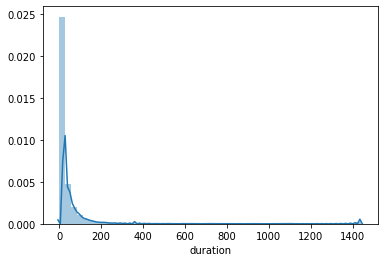

In [14]:
#Explore the distribution of the duration variable
sns.distplot(bikes['duration'],kde=True)

There are obvious outliers effecting the observation of the distribution of the duration lengths at a duration of 1440

In [15]:
#Descriptive statistics for the durationmcolumn
bikes.duration.describe()

count    95283.000000
mean        48.318682
std        148.316422
min          1.000000
25%          7.000000
50%         15.000000
75%         35.000000
max       1440.000000
Name: duration, dtype: float64

In [20]:
#Calculate the Interquartile range
q75, q25 = np.percentile(bikes['duration'], [75,25])
iqr = q75 - q25
print(iqr)

28.0


The distribution of the continuous variable of the duration variable is a Poisson distribution inferring that the duration of each of the bike trips is independent of each other. The median duration is 14.0 minutes, compare this with the mean which is 39.1 minutes due to the presence of outliers at the maximum end of the scale consisting of 1440 minutes. This is also indicated by the magnitude of the size of the standard deviation relative to the mean. The total range of the data is 1339 mihnutes, from the graph the range has been severely effected by maximum outliers  a more indicative descriptive statistic of the total duration of the journey lies between quartile 1 and quartile 3: 7 and 33 minutes respectively, an interquartile range of 26 minutes.

#### Distribution relating to the passholder type  

A dist plot was the easiest to 

In [21]:
df_oneday = bikes.loc[(bikes['passholder_type'] == 'One Day Pass'), 'duration']
df_flex = bikes.loc[(bikes['passholder_type'] == 'Flex Pass'), 'duration']
df_annual = bikes.loc[(bikes['passholder_type'] == 'Annual Pass'), 'duration']
df_monthly = bikes.loc[(bikes['passholder_type'] == 'Monthly Pass'), 'duration']
df_walkup = bikes.loc[(bikes['passholder_type'] == 'Walk-up'), 'duration']

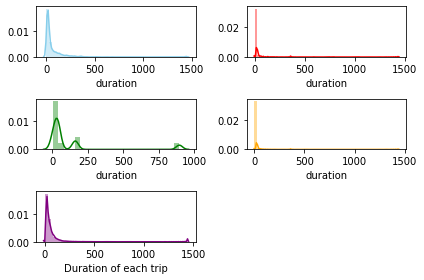

In [22]:
#Plot the distributions of each of the ticket types
plt.subplot(3,2,1)
sns.distplot(df_oneday , color='skyblue', label='Flex Pass')
plt.subplot(3,2,2)
sns.distplot( df_flex , color='red', label='One Day Pass')
plt.subplot(3,2,3)
sns.distplot( df_annual , color='green', label='annual Pass')
plt.subplot(3,2,4)
sns.distplot( df_monthly , color='orange', label='monthly Pass')
plt.subplot(3,2,5)
sns.distplot( df_walkup , color='purple', label='monthly Pass')
plt.xlabel('Duration of each trip')
plt.tight_layout()

There are a large number of outliers in the data which leads to an unclear visualisation if the distribution of the data is to be observed, there are so many outlier data points that using a box plot does not effectively visualize the distribution of the data. From the figures it can be seen than even when plotted by passholder type, the ditribution stays mostly as a Poisson distribution. The most amount of variation in the trip duration is for those that have an annual pass.

#### Statistical testing for duration relative to passholder type

Text(0.5, 1.0, 'Distribution of duration for ticket passes')

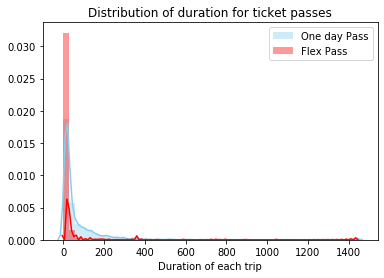

In [23]:
#Plot the distributions of each of the ticket types
sns.distplot(df_oneday , color='skyblue', label='One day Pass')
sns.distplot( df_flex , color='red', label='Flex Pass')
plt.legend()
plt.xlabel('Duration of each trip')
plt.title('Distribution of duration for ticket passes')

From the distributions of the durations for each of the ticket types it can be observd that the distribtutions are similar. The null hypothesis for this experiment would be that the mean duration of each trip was not dependent on which pass the customer has between the one day and the flex pass holders. The alternative hypothesis is that there is a difference in the duration of the journey between the one day and the flex pass holders.

In [24]:
print(df_flex.mean())
print(df_oneday.mean())
print('Number of flex holders: ' + str(df_flex.size))
print('Number of one day pass holders: ' + str(df_oneday.size))

20.09131261889664
76.22778129617902
Number of flex holders: 1577
Number of one day pass holders: 4737


In [30]:
test = ttest_ind(df_oneday, df_flex)

In [31]:
test.statistic

13.897993285036403

There is a significant positive t statistic that indicates that there is a significant difference between the means of the flex pass holders and the one day pass holders

In [32]:
test.pvalue

2.8141174842219548e-43

Looking at the p-value for the hypothesis t test shows a number significantly smaller than p<0.05, the normally accepted p-value for hypothesis testing. Therefore we must reject the null hypothesis, meaning that the journey duration for both the one day and the flex pass holders is not the same. However, that does not mean that we accept the alternate hypothesis, we can only reject the null hypothesis.

## Datetime cells

In [33]:
bikes['start_time'] =  pd.to_datetime(bikes['start_time'],format='%Y-%m-%d')
bikes['end_time'] =  pd.to_datetime(bikes['end_time'],format='%Y-%m-%d')
bikes.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,94851140,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6279,30,One Way,Monthly Pass
1,94851141,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6518,365,One Way,Flex Pass
2,94851138,15,2018-07-01 00:09:00,2018-07-01 00:24:00,4147,34.145248,-118.150070,4174,34.165291,-118.150970,4823,365,One Way,Monthly Pass
3,94851137,7,2018-07-01 00:22:00,2018-07-01 00:29:00,4157,34.140999,-118.132088,4162,34.147499,-118.148010,6115,30,One Way,Monthly Pass
4,94851136,35,2018-07-01 00:23:00,2018-07-01 00:58:00,3013,33.779819,-118.263023,3013,33.779819,-118.263023,12055,1,Round Trip,Walk-up


In [34]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95283 entries, 0 to 95282
Data columns (total 14 columns):
trip_id                95283 non-null int64
duration               95283 non-null int64
start_time             95283 non-null datetime64[ns]
end_time               95283 non-null datetime64[ns]
start_station          95283 non-null int64
start_lat              95283 non-null float64
start_lon              95283 non-null float64
end_station            95283 non-null int64
end_lat                95283 non-null float64
end_lon                95283 non-null float64
bike_id                95283 non-null int64
plan_duration          95283 non-null int64
trip_route_category    95283 non-null object
passholder_type        95283 non-null object
dtypes: datetime64[ns](2), float64(4), int64(6), object(2)
memory usage: 10.2+ MB


In [35]:
#Distribution of duration related to th
bikes['new_time'] = bikes['start_time'].apply(lambda time: time.hour)
bikes.head(10)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,new_time
0,94851140,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6279,30,One Way,Monthly Pass,0
1,94851141,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6518,365,One Way,Flex Pass,0
2,94851138,15,2018-07-01 00:09:00,2018-07-01 00:24:00,4147,34.145248,-118.150070,4174,34.165291,-118.150970,4823,365,One Way,Monthly Pass,0
3,94851137,7,2018-07-01 00:22:00,2018-07-01 00:29:00,4157,34.140999,-118.132088,4162,34.147499,-118.148010,6115,30,One Way,Monthly Pass,0
4,94851136,35,2018-07-01 00:23:00,2018-07-01 00:58:00,3013,33.779819,-118.263023,3013,33.779819,-118.263023,12055,1,Round Trip,Walk-up,0
5,94851135,6,2018-07-01 00:38:00,2018-07-01 00:44:00,3029,34.048851,-118.246422,3082,34.046520,-118.237411,6370,1,One Way,Walk-up,0
6,94851134,5,2018-07-01 00:39:00,2018-07-01 00:44:00,3029,34.048851,-118.246422,3082,34.046520,-118.237411,6566,1,One Way,Walk-up,0
7,94857739,33,2018-07-01 00:40:00,2018-07-01 01:13:00,3069,34.050880,-118.248253,3075,34.042110,-118.256187,6407,1,One Way,Walk-up,0
8,94851133,6,2018-07-01 00:44:00,2018-07-01 00:50:00,3067,34.045181,-118.250237,3062,34.047749,-118.243172,5859,30,One Way,Monthly Pass,0
9,94851132,3,2018-07-01 00:46:00,2018-07-01 00:49:00,3034,34.042061,-118.263382,3074,34.044170,-118.261169,6562,30,One Way,Monthly Pass,0


In [36]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95283 entries, 0 to 95282
Data columns (total 15 columns):
trip_id                95283 non-null int64
duration               95283 non-null int64
start_time             95283 non-null datetime64[ns]
end_time               95283 non-null datetime64[ns]
start_station          95283 non-null int64
start_lat              95283 non-null float64
start_lon              95283 non-null float64
end_station            95283 non-null int64
end_lat                95283 non-null float64
end_lon                95283 non-null float64
bike_id                95283 non-null int64
plan_duration          95283 non-null int64
trip_route_category    95283 non-null object
passholder_type        95283 non-null object
new_time               95283 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(7), object(2)
memory usage: 10.9+ MB


In [37]:
durt= bikes.groupby('new_time')['duration'].median()
durt

new_time
0     16
1     17
2     20
3     14
4     11
5      7
6      8
7      7
8     10
9     11
10    18
11    19
12    17
13    18
14    21
15    19
16    16
17    14
18    16
19    16
20    15
21    15
22    15
23    15
Name: duration, dtype: int64

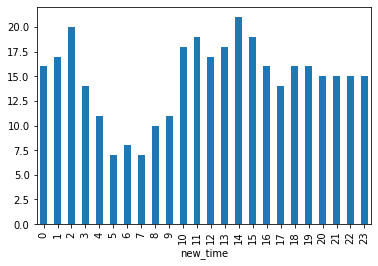

In [38]:
durt.plot(kind='bar')

Using the median for plotting the newly formatted times, as to remove any influence of outliers on the journey durations. The figure above indicates that the median duration journeys taken on the bikes are longer between the hours of 10 and 3 during the day and between 12 and 2 at night. This makes sense as most leisure bike rides would be taken in the middle of the day and when public transport stops at night customers would most likely resort to renting a bike to speed up their journey.

In [39]:
bikes['day_of_week']=bikes['start_time'].apply(lambda time: time.dayofweek)
bike.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,94851140,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6279,30,One Way,Monthly Pass
1,94851141,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6518,365,One Way,Flex Pass
2,94851138,15,2018-07-01 00:09:00,2018-07-01 00:24:00,4147,34.145248,-118.150070,4174,34.165291,-118.150970,4823,365,One Way,Monthly Pass
3,94851137,7,2018-07-01 00:22:00,2018-07-01 00:29:00,4157,34.140999,-118.132088,4162,34.147499,-118.148010,6115,30,One Way,Monthly Pass
4,94851136,35,2018-07-01 00:23:00,2018-07-01 00:58:00,3013,33.779819,-118.263023,3013,33.779819,-118.263023,12055,1,Round Trip,Walk-up


In [28]:
durd= bikes.groupby('day_of_week')['duration'].median()
durd

day_of_week
0    13
1    12
2    12
3    12
4    14
5    21
6    25
Name: duration, dtype: int64

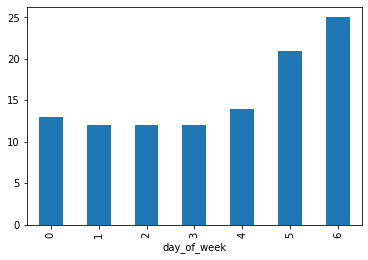

In [29]:
durd.plot(kind='bar')

Separating the datetime cells into the days of the week indexed from zero allows us to visualise the median duration of the journeys on each day. As before the median duration was used as to avoid the influence of outliers. From the figure above it can be observed that the median length of a bike journey gets drastically longer during the weekend when compared to the weekdays. Again this is logical as more people would be out on leisurely bike rides at the weekend when not at work

In [40]:
durp= pd.crosstab(bikes['day_of_week'], bike['passholder_type'])
durp.head(7)

passholder_type,Annual Pass,Flex Pass,Monthly Pass,One Day Pass,Walk-up
day_of_week,,,,,
0,0,218,6882,547,5297
1,0,235,7375,457,5026
2,0,235,7017,574,5289
3,0,245,7196,413,5526
4,0,263,6775,534,6232
5,10,178,4085,869,8528
6,2,203,4637,1343,9092


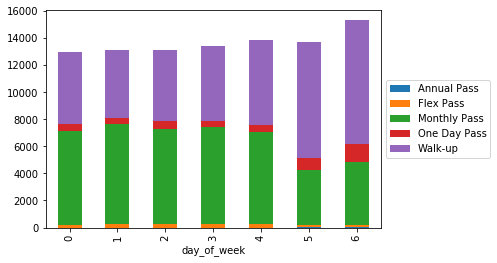

In [41]:
durp.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

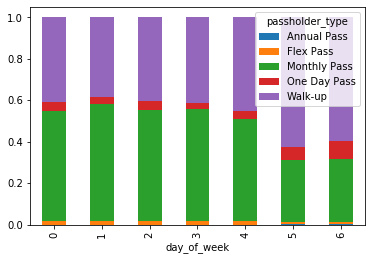

In [58]:
durp.div(durp.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

If the duration data for the data of the week is broken down into passholder type, the first thing to notice is that there are significantly more customers that are using both walk-up and one day passes during the weekends. When the data is normalized into fractions, it can also be observed that there are only about half of the customers with monthly passes that use the bikes at the weekend. The same statement can be made for those with a flex pass. In contrast those customers with an annual pass seem to use the bikes more at the weekend in comparison to the weekdays. The is probably due to more people using the bikes during their free time as well as a higher frequency of tourists to the city at the weekend, whereas during the weekdays there is a higher proportion of customers that are using the bikes to commute to work. This is also indicated by the significant change in the length of the duration of the journeys on the bikes at the weekend relative to the res of the week.

#  Task 2: Seed Shape data

The task involved was to apply a clustering algorithm to the data. First load the data into a dataframe and make sure there is no data cleaning to be carried out

In [47]:
seed=pd.read_csv('D:\\cs3pp19-data\\seeds.csv')

In [48]:
seed.head()

,area,perimeter,compactness,length,width,asymmetry,groove length
0,15.26,14.84,0.871,5.763,3.312,2.221,5.220
1,14.88,14.57,0.881,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.895,5.324,3.379,2.259,4.805
4,16.14,14.99,0.903,5.658,3.562,1.355,5.175


In [49]:
seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
area             210 non-null float64
perimeter        210 non-null float64
compactness      210 non-null float64
length           210 non-null float64
width            210 non-null float64
asymmetry        210 non-null float64
groove length    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [50]:
seed.shape

(210, 7)

There are no missing values and the outcomes are unlabelled, therefore the data has already been prepared to apply clustering. However, there are seven features available in the seeds dataset and only 210 rows in the data set, this is too many dimensions and not enough sample for a clustering algorithm to work efficiently.

In [51]:
seed.describe()

,area,perimeter,compactness,length,width,asymmetry,groove length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.871000,5.628533,3.258605,3.700200,5.408071
std,2.909699,1.305959,0.023594,0.443063,0.377714,1.503559,0.491480
min,10.590000,12.410000,0.808000,4.899000,2.630000,0.765000,4.519000
25%,12.270000,13.450000,0.857250,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873500,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887750,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918000,6.675000,4.033000,8.456000,6.550000


There are no obvious trends that can be explained from the descriptive statistics other than there are some outliers but there are not enough to have a significant effect on the mean. An easy way to observe any obvious trends between  the features is to use a pairplot

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


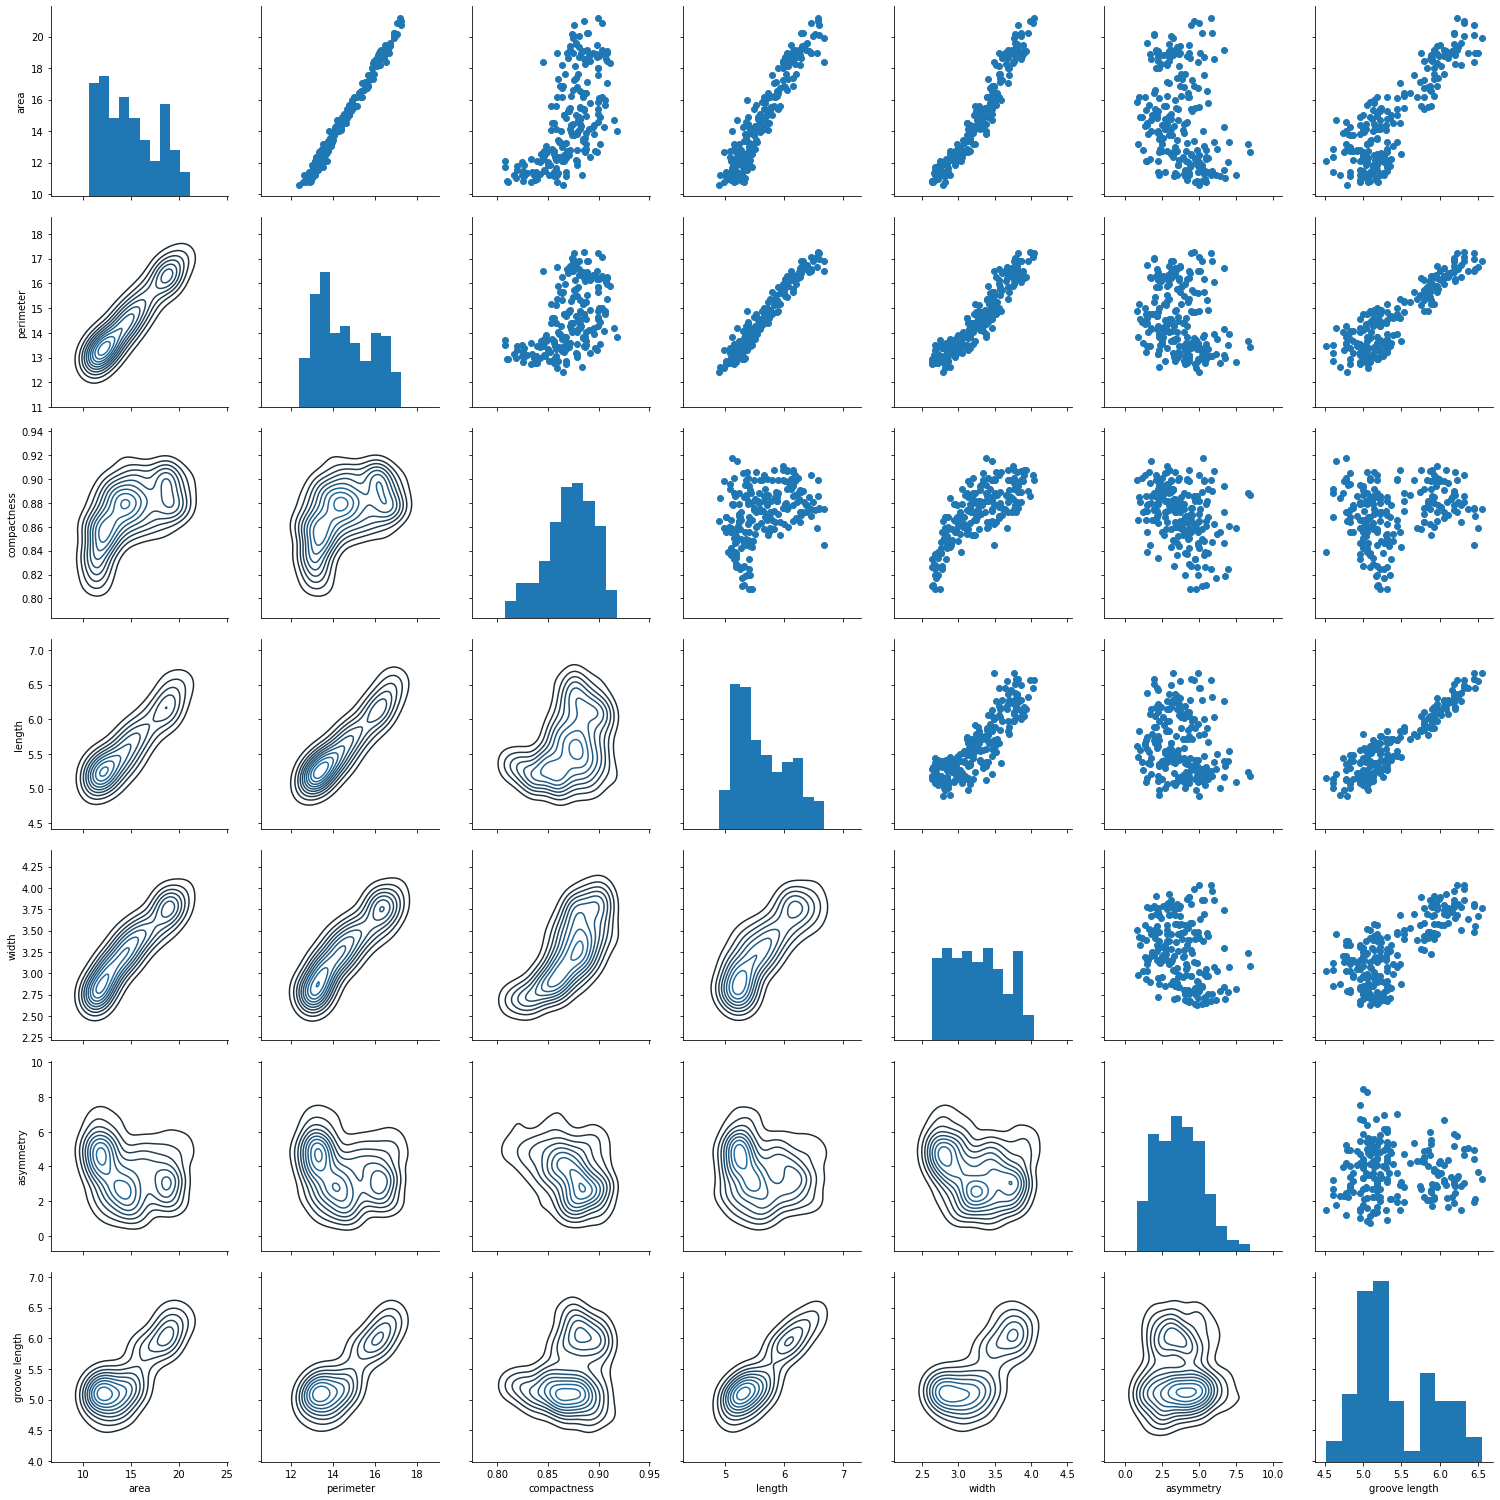

In [52]:
g = sns.PairGrid(seed,size=3,vars=["area","perimeter","compactness", "length","width","asymmetry","groove length"])
g = g.map_upper(plt.scatter, linewidths=1)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(plt.hist, lw=3)
plt.show()

The pairplot shows that there are a lot of features that are strongly correlated, this will interfere with the effectiveness of the clustering algorithm. Most of the features have a skewed or normal distribution. When the feature distributions are plotted against each other there is a suggestion of two or three clusters. From the pairplot it can be assumed that groove length would be a major factor in the application of any clustering algorithm In order to observe which features heavily correlate with each other, we have produced a correlation matrix.

In [53]:
matrix1=seed.corr()

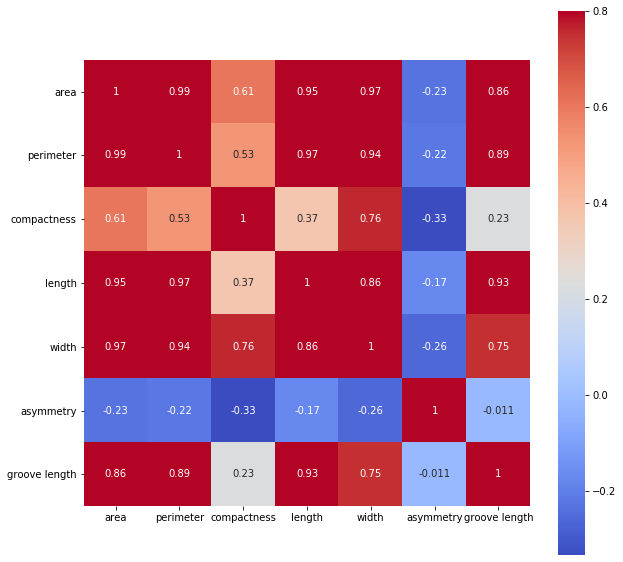

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(matrix1, vmax=.8, square=True, cmap='coolwarm',annot=True)
#Matplot lib had a regression introduced in 3.11 which cut the top and bottom off of heatmaps, below is just a fix
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

Clustering algorithms are used to observe trends which are not conventionally observable through correlation means. In this dataset many of the features correlate well with each other except for asymmetry, groove length, compactness and length respectively. Asymmetry does not correlate at all with any of the other features and so can be removed. This therefore leaves three features. Of the three features both length and groove length can be clustered against compactness as these two features have a high amount of correlation with all of the other features otherwise. We could also use a principle component analysis to reduce the diensionality of the data

In [83]:
#Import packages for Clustering
from sklearn.mixture import GaussianMixture

In [84]:
gmm = GaussianMixture(2)

In [85]:
fit = gmm.fit(seed[['compactness','length']])
predict=gmm.predict(seed[['compactness','length']])

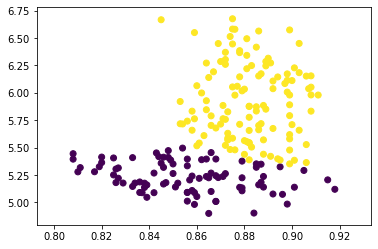

In [86]:
plt.scatter(seed['compactness'], seed['length'], c = predict)

In [87]:
gmm = GaussianMixture(2)

In [88]:
fit = gmm.fit(seed[['compactness','groove length']])
predict=gmm.predict(seed[['compactness','groove length']])

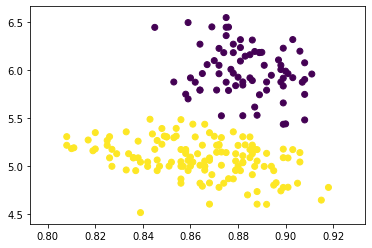

In [89]:
plt.scatter(seed['compactness'], seed['groove length'], c = predict)

A comparison of clusterings between groove length and length with respect to compactness show that groove length has a better separation of clusters and therefore better clustering. Athough we started with two clusters, it is not necessarily true that 2 clusters is the optimal number of clusters, therefore it it better that we iterate through the clusters to find out which is best.

In [90]:
x_values = []
model_aic = []
model_bic = []
#iterate through the number of clusters k that would provide a good model
for k in range(1, 10):
    mixturemodel = GaussianMixture(k)
    mixturemodel.fit(seed[['compactness', 'groove length']])
    model_aic.append(mixturemodel.aic(seed[['compactness', 'groove length']]))
    model_bic.append(mixturemodel.bic(seed[['compactness', 'groove length']]))
    x_values.append(k)

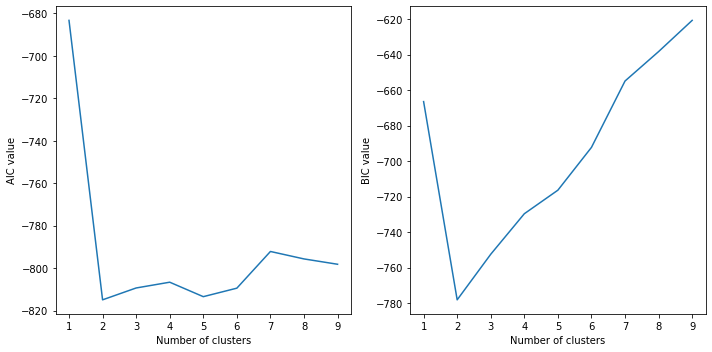

In [91]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x_values, model_aic)
plt.xlabel('Number of clusters')
plt.ylabel('AIC value')
plt.subplot(1,2,2)
plt.plot(x_values, model_bic)
plt.xlabel('Number of clusters')
plt.ylabel('BIC value')
plt.tight_layout()

The best number of clusters (k value) to use would be 2 as this results in the lowest AIC and BIC value. The lowest value being found at 2 clusters (or sample sizes), for both AIC and BIC, shows that this value best represents the number of clusters within the data. However, this is by using only 2 of the features, however what if we wanted to use all three features observed to try to give better cluster separation.

In [92]:
x_values = []
model_aic = []
model_bic = []
#iterate through the number of clusters k that would provide a good model
for k in range(1, 10):
    mixturemodel = GaussianMixture(k)
    mixturemodel.fit(seed[['length','compactness', 'groove length']])
    model_aic.append(mixturemodel.aic(seed[['length','compactness', 'groove length']]))
    model_bic.append(mixturemodel.bic(seed[['length','compactness', 'groove length']]))
    x_values.append(k)

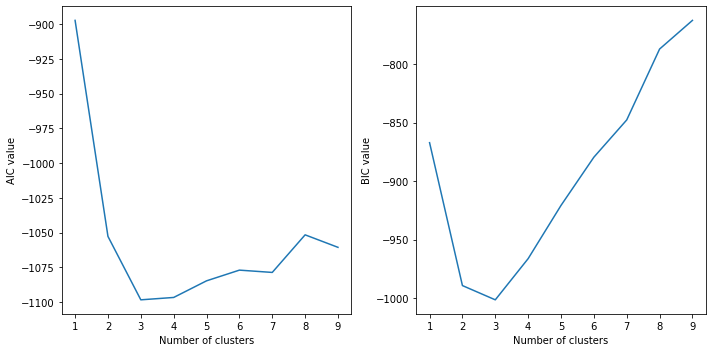

In [93]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x_values, model_aic)
plt.xlabel('Number of clusters')
plt.ylabel('AIC value')
plt.subplot(1,2,2)
plt.plot(x_values, model_bic)
plt.xlabel('Number of clusters')
plt.ylabel('BIC value')
plt.tight_layout()

From the AIC and the BIC plots it can be seen that when using the three features the k number that is best is 3. Trying to visualise clustering using 3 features on a two dimensional graph is difficult so therefore much better trying to visualise the clustering on a 3D image.

In [94]:
gmm = GaussianMixture(3)

In [95]:
fit = gmm.fit(seed[['length','compactness','groove length']])
predict=gmm.predict(seed[['length','compactness','groove length']])

Text(0.5, 0, 'groove length')

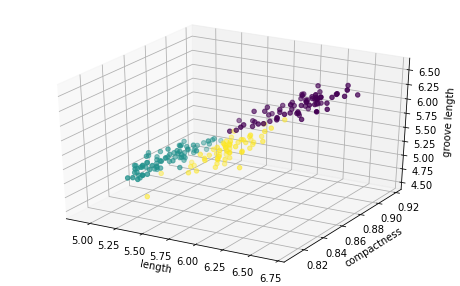

In [96]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(seed['length'],seed['compactness'], seed['groove length'], c = predict)
ax.set_xlabel('length')
ax.set_ylabel('compactness')
ax.set_zlabel('groove length')

It can be seen that when we try to fit the three features at the same time we can see that there are now 3 distinct clusters with a good degree of separation. So although initially the best number of clusters to use was 2 when using 2 of the 3 obvious features to use for clustering. However, when adding the third feature the best number of clusters to use was 3. Any more dimensions than three or four will probably not result in improved accuracy of clusters. Again, it probably would have been more efficient to do a principle component analysis for dimensionality reduction before starting to cluster the data. But then that is a separate unsupervised learning technique from clustering.

# Task 3: Social network analysis

In [2]:
import networkx as nx
from operator import itemgetter
import community

a) Produce a visualisation of the network and discuss the output

In [6]:
snet=pd.read_csv('D:\\cs3pp19-data\\social-network.csv',)
snet.head()

,1,2
0,1,3
1,1,4
2,1,5
3,1,6
4,1,7


In [7]:
snet.shape

(2980, 2)

The social-network.csv is provided as an edge list. The easiest way to get the data into networkx is to parse the data line by line

In [8]:
Data = open('D:\\cs3pp19-data\\social-network.csv', "r")
next(Data, None)  # skip the first line in the input file
Graphtype = nx.Graph()

g = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype,
                      nodetype=int, data=(('weight', float),))

In [9]:
g.name = 'Graph of social network'
print(nx.info(g))

Name: Graph of social network
Type: Graph
Number of nodes: 2887
Number of edges: 2980
Average degree:   2.0644


In [24]:
nx.is_directed(g)

False

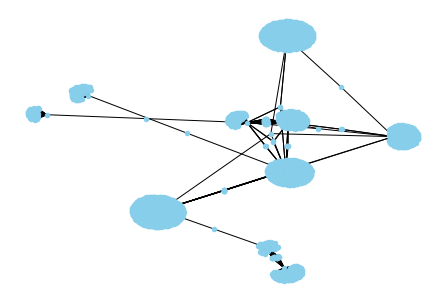

In [21]:
nx.draw(g, with_labels=False, node_size=20, node_color="skyblue", pos=nx.fruchterman_reingold_layout(g))

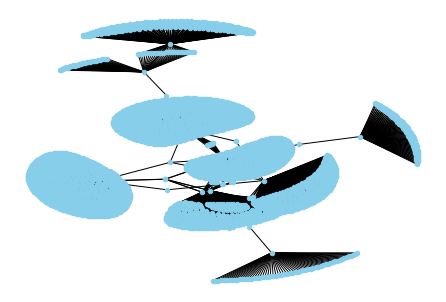

In [18]:
nx.draw(g, with_labels=False, node_size=20, node_color="skyblue", pos=nx.kamada_kawai_layout(g))

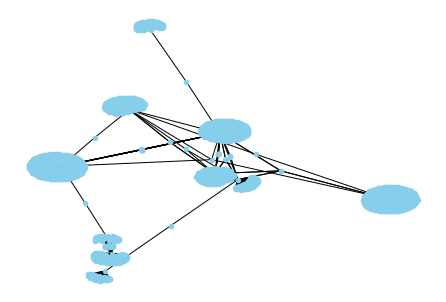

In [22]:
nx.draw(g, with_labels=False, node_size=20, node_color="skyblue", pos=nx.spring_layout(g))

Thee are several different visualisations that have been attempted observe the network. From the four visualisations attmpted here, the best best visualisation to observe node connectivity within a hub would be the kamada kawai layout, whereas the best visualisation to observe hub connectivity would be the spring layout. From the graph it looks as though the larger hubs containing on the outer edges of the graph are connected to smaller hubs before being connected to a more central hub. The nodes in the centre of the graph are quite small except for one central hub. The network is diffuse as the majority of nodes are clustered into hubs. There is no information on graph directionality so we assume the graph is undirected

In [110]:
nx.number_connected_components(g)

1

In [104]:
nx.diameter(g)

9

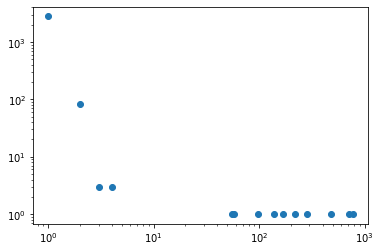

In [105]:
ddist = nx.degree_histogram(g)[1:] # Skip 0 degree nodes
plt.loglog(range(1,len(ddist)+1),ddist,'o')

(array([2.806e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 7.700e+01]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

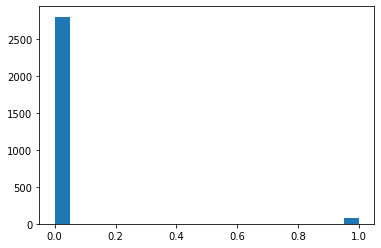

In [106]:
cc = nx.clustering(g)
plt.hist(list(cc.values()),bins=20)

In [107]:
density = nx.density(g)
print("Network density:", density)

Network density: 0.0007153245809290146


In [108]:
triadic_closure = nx.transitivity(g)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.00035951564156422224


Even though there are a large number of nodes in this network, there are also a large number edges. This leads to a low network density. The lack of interconnectivity in the social network is also shown in the clustering coefficients and the triadic closure. However there is one cluster that is connected to over 90% of the others indicating a central hub for the network

In [119]:
betweenness_dict = nx.betweenness_centrality(g)
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)


Top 20 nodes by betweenness centrality:
(603, 0.5498572642766948)
(288, 0.4662070762937073)
(1525, 0.4295731259856024)
(247, 0.24124766547644544)
(1, 0.18553227937977304)
(2699, 0.13104210729860644)
(1524, 0.13023320614308484)
(710, 0.12728835154311563)
(714, 0.112806987096417)
(2687, 0.09932117159153556)
(2232, 0.06543271707916423)
(335, 0.06498424834646672)
(716, 0.06309278882935794)
(719, 0.06309278882935794)
(2594, 0.03939991184358602)
(2536, 0.0391176671939237)
(35, 0.02394563607735185)
(69, 0.021741725727860768)
(71, 0.00885680107517199)
(90, 0.0033071126052061587)


(-0.9297149396397593,
 0.6213132358052256,
 -0.8288611145281226,
 1.08835673048729)

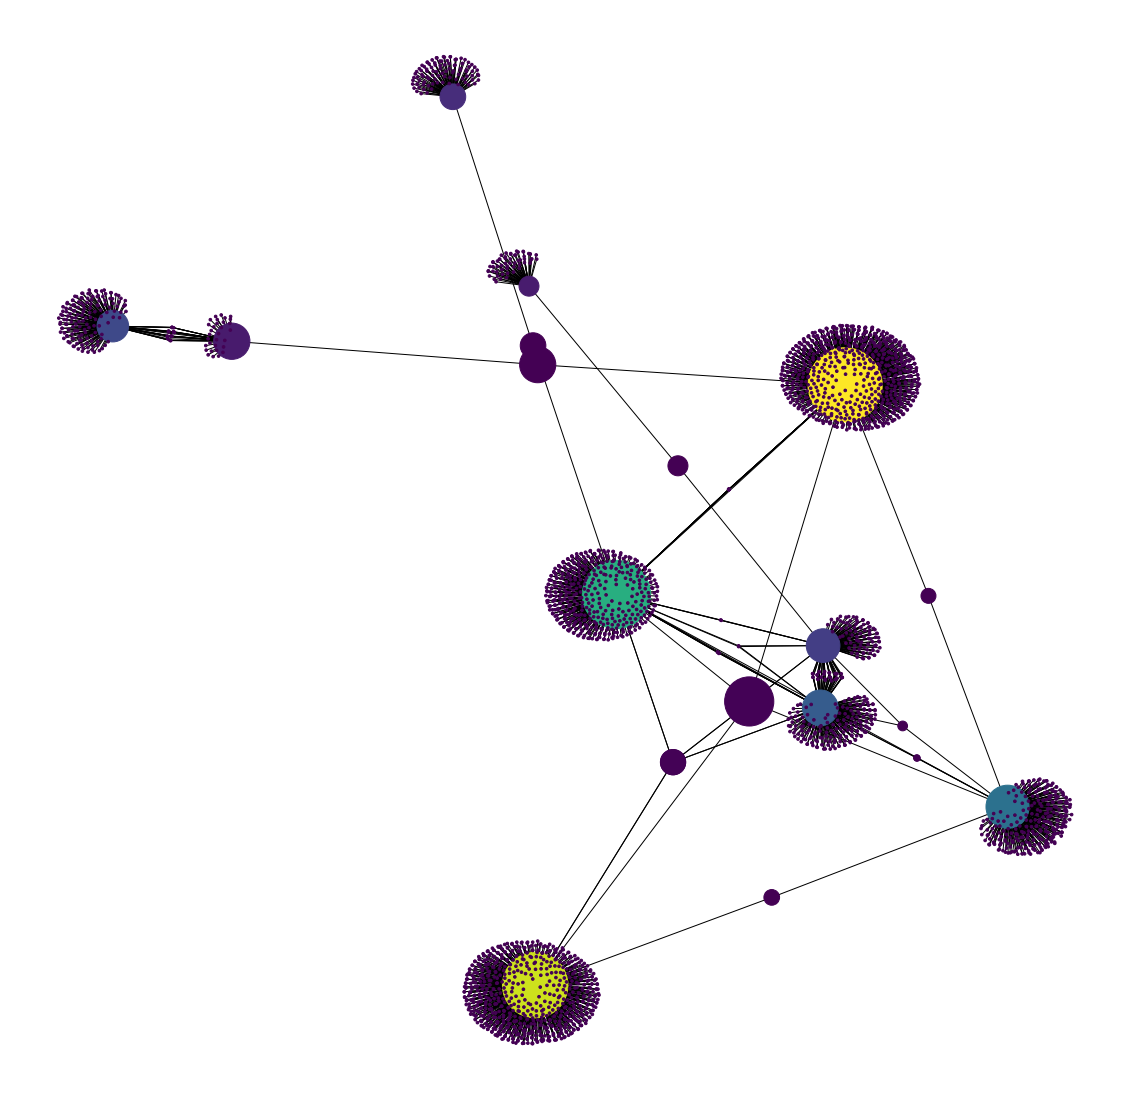

In [28]:
pos = nx.spring_layout(g)
betCent = nx.betweenness_centrality(g, normalized=True, endpoints=True)
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

When organised into betweeness centrality, it can be seen that the most frequent number of shortest paths pass through node 603, which can also be seen in the degree of sortedness, this indicates that node 603 is one of the major hubs within the network. When the betweeness centrality is visualised, we are able to effectively observe the interconnectivity of each of the hubs

In [30]:
degree_dict = nx.degree_centrality(g)
nx.set_node_attributes(g, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by degree centrality:")
for b in sorted_degree[:20]:
    print(b)

Top 20 nodes by degree centrality:
(603, 0.2664587664587665)
(1525, 0.24601524601524602)
(288, 0.16666666666666666)
(1, 0.0990990990990991)
(710, 0.07657657657657657)
(2687, 0.058905058905058906)
(714, 0.04816354816354816)
(2232, 0.03361053361053361)
(2536, 0.020097020097020097)
(2699, 0.019057519057519057)
(247, 0.001386001386001386)
(716, 0.001386001386001386)
(719, 0.001386001386001386)
(71, 0.0010395010395010396)
(711, 0.0010395010395010396)
(720, 0.0010395010395010396)
(35, 0.000693000693000693)
(69, 0.000693000693000693)
(90, 0.000693000693000693)
(217, 0.000693000693000693)


(-0.6877377427079203,
 1.0014483130433085,
 -1.076693534996453,
 0.5839340092205436)

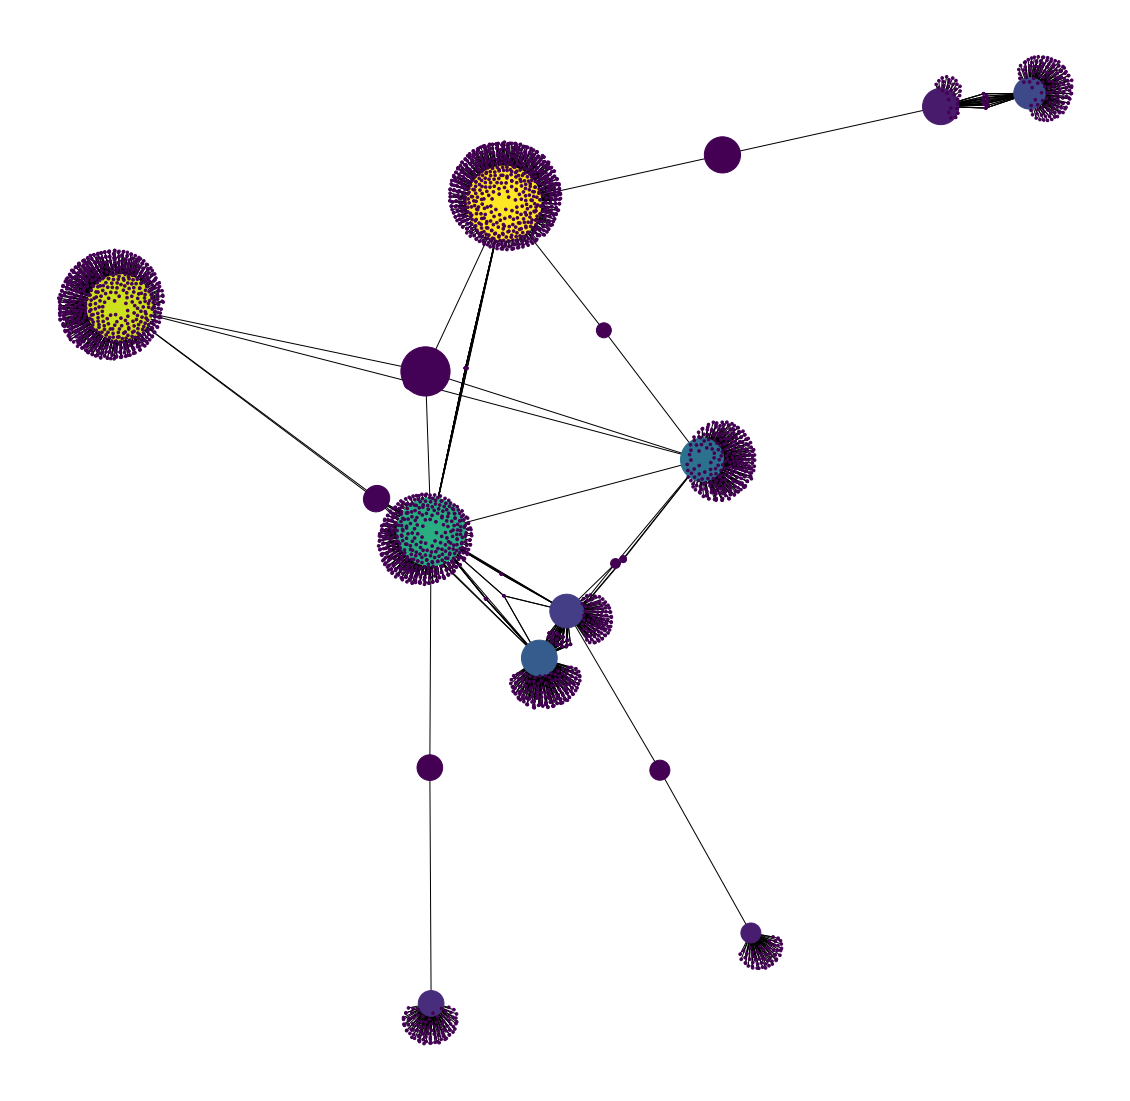

In [33]:
pos = nx.spring_layout(g)
degCent = nx.degree_centrality(g)
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

Furthermore when analysing the degree centrality, which is a measure of connectedness we can that node 603 again ranks top. This is indicative of a central hub as node 603 is the most connected and is the most important node for information flow. In fact the top three nodes remain the same between betweeness centrality and degree centrality indicating that these three nodes act as central hubs for the whole network.